In [1]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing Dataset

# read data as panda dataframe
data = pd.read_csv("df_new.csv")

# printing the dataset shape
print("Dataset No. of Rows: ", data.shape[0])
print("Dataset No. of Columns: ", data.shape[1])

# printing the dataset observations
print("Dataset first few rows:\n ")
print(data.head(3))

Dataset No. of Rows:  953603
Dataset No. of Columns:  29
Dataset first few rows:
 
   Unnamed: 0 Severity  Temperature(F)  Wind_Chill(F)  Humidity(%)  \
0           0      Low            36.0           36.0         59.0   
1           1      Low            36.0           36.0         55.0   
2           2      Low            31.0           31.0         72.0   

   Pressure(in)  Visibility(mi)  Wind_Speed(mph)  Precipitation(in)  Amenity  \
0         30.20            10.0              3.0                0.0        0   
1         30.04            10.0              0.0                0.0        0   
2         30.16            10.0              0.0                0.0        0   

   ...  Traffic_Calming  Traffic_Signal  Sunrise_Sunset  Year        Date  \
0  ...                0               0               1  2019  2019-12-25   
1  ...                0               0               1  2019  2019-12-25   
2  ...                0               0               0  2019  2019-12-25   

   Mon

In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)
print(data.columns)

Index(['Severity', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Year', 'Date',
       'Month', 'Day', 'Hour', 'Weekday', 'Time_Duration(min)'],
      dtype='object')


In [4]:
# split the dataset
# separate the target variable
X = data.values[:, 1:21]
Y = data.values[:,0]

In [5]:
class_le = LabelEncoder()

y = class_le.fit_transform(Y)

In [6]:
# split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [7]:
# perform training
# creating the classifier object
clf = LogisticRegression()

# performing training
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
# make predictions
# predicton on test
y_pred = clf.predict(X_test)

y_pred_score = clf.predict_proba(X_test)

In [9]:
# calculate metrics
print("\n")

print("Classification Report: ")
print(classification_report(y_test,y_pred))
print("\n")


print("Accuracy : ", accuracy_score(y_test, y_pred) * 100)
print("\n")

print("ROC_AUC : ", roc_auc_score(y_test,y_pred_score[:,1]) * 100)
print("\n")



Classification Report: 
              precision    recall  f1-score   support

        High       0.45      0.01      0.02     80076
         Low       0.72      1.00      0.84    206005

    accuracy                           0.72    286081
   macro avg       0.58      0.50      0.43    286081
weighted avg       0.64      0.72      0.61    286081



Accuracy :  71.95829153281763


ROC_AUC :  63.74530890758269




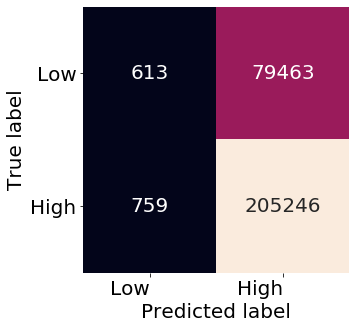

In [10]:
# confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)
class_names = data['Severity'].unique()

df_cm = pd.DataFrame(conf_matrix, index=class_names, columns=class_names )

plt.figure(figsize=(5,5))
hm = sns.heatmap(df_cm, cbar=False, annot=True, square=True, fmt='d', annot_kws={'size': 20}, yticklabels=df_cm.columns, xticklabels=df_cm.columns)
hm.yaxis.set_ticklabels(hm.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
hm.xaxis.set_ticklabels(hm.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
plt.ylabel('True label',fontsize=20)
plt.xlabel('Predicted label',fontsize=20)
plt.tight_layout()
plt.show()